# Load the datasets from Kaggle

In [ ]:
nfrom google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4tY37wYR9nTm7Zz7vI_ZJTuCmrKCR_bxiBtgWrMVFaoKfPh2Poy5A
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Kaggle


/content/drive/My Drive/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
!chmod 600 kaggle.json
!ls

kaggle.json  model_EI.pkl  model_JP.pkl  vectorizer_indo.pkl
mbti_1.csv   model_FT.pkl  model_NS.pkl  vectorizer.pkl


In [ ]:
!kaggle datasets download -d datasnaek/mbti-type

 70% 17.0M/24.4M [00:00<00:00, 61.2MB/s]
100% 24.4M/24.4M [00:00<00:00, 80.5MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  mbti-type.zip
replace mbti_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np 
import pandas as pd

data = pd.read_csv("mbti_1.csv")
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


# **Spliting the Data into Binary**

In [ ]:
split_df = data[['type']].copy()

split_df['E-I'] = data['type'].str.extract('(.)[N,S]',1)
split_df['N-S'] = data['type'].str.extract('[E,I](.)[F,T]',1)
split_df['T-F'] = data['type'].str.extract('[N,S](.)[J,P]',1)
split_df['J-P'] = data['type'].str.extract('[F,T](.)',1)

Encode Letters to Numeric Value

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded_df = split_df[['type']].copy()
encoded_df['E0-I1'] = le.fit_transform(split_df['E-I'])
encoded_df['N0-S1'] = le.fit_transform(split_df['N-S'])
encoded_df['F0-T1'] = le.fit_transform(split_df['T-F'])
encoded_df['J0-P1'] = le.fit_transform(split_df['J-P'])

binary_type = encoded_df.drop(columns='type')

corrMatrix = binary_type.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,E0-I1,N0-S1,F0-T1,J0-P1
E0-I1,1.000000,0.045899,-0.069573,-0.161939
N0-S1,0.045899,1.000000,0.080954,0.014922
F0-T1,-0.069573,0.080954,1.000000,0.004673
J0-P1,-0.161939,0.014922,0.004673,1.000000


Counting each of type data

In [ ]:
count_type = data.groupby('type').agg({'type':'count'})
count_type

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


Show the data into graph to more easier read the dataset

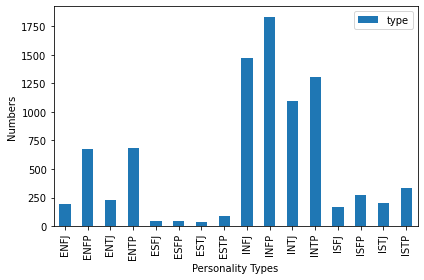

In [ ]:
from matplotlib import pyplot as plt

histogram_chart = count_type.plot(kind='bar')
histogram_chart.set_xlabel("Personality Types")
histogram_chart.set_ylabel("Numbers")
plt.tight_layout()

# **Cleaning the Data into Readable Text**

In [ ]:
http_post = data.copy()
http_post['http_per_post']=data['posts'].apply(lambda x: x.count('http')/50)
http_post.head()

,type,posts,http_per_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0.48
1,ENTP,'I'm finding the lack of me in these posts ver...,0.20
2,INTP,'Good one _____ https://www.youtube.com/wat...,0.10
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0.04
4,ENTJ,'You're fired.|||That's another silly misconce...,0.12


In [ ]:
remove_http_post = "(http.*?\s)"
data['no_url'] = data['posts'].replace(remove_http_post,"",regex=True)
data.head()

,type,posts,no_url
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'and intj moments sportscenter not top ten p...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ course, to which I say I kn..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...


In [ ]:
remove_line = "(\|\|\|)"
data['text']=data['no_url'].replace(remove_line,"",regex=True)
data.head()

,type,posts,no_url,text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'and intj moments sportscenter not top ten p...,'and intj moments sportscenter not top ten p...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ course, to which I say I kn...","'Good one _____ course, to which I say I kn..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...,'You're fired.That's another silly misconcepti...


In [ ]:
remove_punctuations = "[^\w\s]"
data['text']=data['text'].replace(remove_punctuations,"",regex=True)
data.head()

,type,posts,no_url,text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'and intj moments sportscenter not top ten p...,and intj moments sportscenter not top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,Im finding the lack of me in these posts very ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ course, to which I say I kn...",Good one _____ course to which I say I know...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...,Youre firedThats another silly misconception T...


In [ ]:
remove_underscore = "\_"
data['text']=data['text'].replace(remove_underscore,"",regex=True)
data.head()


,type,posts,no_url,text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'and intj moments sportscenter not top ten p...,and intj moments sportscenter not top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,Im finding the lack of me in these posts very ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ course, to which I say I kn...",Good one course to which I say I know that...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...,Youre firedThats another silly misconception T...


In [ ]:
remove_numbers = "\d+"
data['text']=data['text'].replace(remove_numbers,"",regex=True)
data.head()

,type,posts,no_url,text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'and intj moments sportscenter not top ten p...,and intj moments sportscenter not top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,Im finding the lack of me in these posts very ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ course, to which I say I kn...",Good one course to which I say I know that...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...,Youre firedThats another silly misconception T...


In [ ]:
remove_letter_words = "\W*\b\w\b"
data['text']=data['text'].replace(remove_letter_words,"",regex=True)
data.head()

,type,posts,no_url,text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'and intj moments sportscenter not top ten p...,and intj moments sportscenter not top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,Im finding the lack of me in these posts very ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ course, to which I say I kn...",Good one course to which I say I know that...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...",Dear INTP I enjoyed our conversation the oth...
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...,Youre firedThats another silly misconception T...


In [ ]:
data['text']=data['text'].str.lower()
data.head()

,type,posts,no_url,text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'and intj moments sportscenter not top ten p...,and intj moments sportscenter not top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,im finding the lack of me in these posts very ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ course, to which I say I kn...",good one course to which i say i know that...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the oth...
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.|||That's another silly misconce...,youre firedthats another silly misconception t...


In [ ]:
clean_data = data[['type','text']]
clean_data.head()

,type,text
0,INFJ,and intj moments sportscenter not top ten pl...
1,ENTP,im finding the lack of me in these posts very ...
2,INTP,good one course to which i say i know that...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,youre firedthats another silly misconception t...


# **Vectorize Text and Define Features**

Spliting column into 4 combination

In [ ]:
split_data = clean_data[['type','text']].copy()
split_data['E-I'] = split_data['type'].str.extract('(.)[N.S]',1)
split_data['N-S'] = split_data['type'].str.extract('[E,I](.)[F,T]',1)
split_data['T-F'] = split_data['type'].str.extract('[N,S](.)[J.P]',1)
split_data['J-P'] = split_data['type'].str.extract('[F,T](.)',1)
split_data.head()

,type,text,E-I,N-S,T-F,J-P
0,INFJ,and intj moments sportscenter not top ten pl...,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,E,N,T,P
2,INTP,good one course to which i say i know that...,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the oth...,I,N,T,J
4,ENTJ,youre firedthats another silly misconception t...,E,N,T,J


Encode letters into numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder
letters = LabelEncoder()

encoded_data = clean_data[['type','text']].copy()
encoded_data['E0-I1'] =letters.fit_transform(split_data['E-I'])
encoded_data['N0-S1'] =letters.fit_transform(split_data['N-S'])
encoded_data['F0-T1'] =letters.fit_transform(split_data['T-F'])
encoded_data['J0-P1'] =letters.fit_transform(split_data['J-P'])

encoded_data.head()

,type,text,E0-I1,N0-S1,F0-T1,J0-P1
0,INFJ,and intj moments sportscenter not top ten pl...,1,0,0,0
1,ENTP,im finding the lack of me in these posts very ...,0,0,1,1
2,INTP,good one course to which i say i know that...,1,0,1,1
3,INTJ,dear intp i enjoyed our conversation the oth...,1,0,1,0
4,ENTJ,youre firedthats another silly misconception t...,0,0,1,0


In [ ]:
encoded_data.columns

Index(['type', 'text', 'E0-I1', 'N0-S1', 'F0-T1', 'J0-P1'], dtype='object')

**Vectorize Text**

Define X and Y

In [ ]:
x = encoded_data["text"].values
y_all = encoded_data.drop(columns=['type','text'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_all_train, y_all_test = train_test_split(x,y_all,random_state=42)

Define TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=17000,
    min_df=7,
    max_df=0.8,
    stop_words='english',
    ngram_range=(1,3),
)

In [ ]:
import pickle
pickle.dump(vectorizer, open('../Kaggle/vectorizer_indo.pkl','wb'))

Vectors for x

In [ ]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# **Machine Learning Model using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Extrover(E) - Introvert(I) Type Combination**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)

y_EI_train = y_all_train['E0-I1']
y_EI_test = y_all_test['E0-I1']

X_resampled_ros, y_EI_resampled_ros = ros.fit_sample(x_train, y_EI_train)

from collections import Counter
Counter(y_EI_resampled_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 4980, 1: 4980})

Fit Introvert-Extrovert Combination with Oversampled (x_train, y_EI_train)

In [ ]:
classifier.fit(X_resampled_ros, y_EI_resampled_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_EI_pred_ros = classifier.predict(x_test)
EI_result = pd.DataFrame({"Prediction": y_EI_pred_ros, "Actual": y_EI_test})

In [ ]:
import pickle
pickle.dump(classifier, open('../Kaggle/model_EI.pkl','wb'))

**N-S Combination**

In [ ]:
y_NS_train = y_all_train['N0-S1']
y_NS_test = y_all_test['N0-S1']

X_resampled_ros, y_NS_resampled_ros = ros.fit_sample(x_train, y_NS_train)
Counter(y_NS_resampled_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 5616, 1: 5616})

In [ ]:
classifier.fit(X_resampled_ros, y_NS_resampled_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_NS_pred_ros = classifier.predict(x_test)
NS_result = pd.DataFrame({"Prediction": y_NS_pred_ros, "Actual": y_NS_test})
NS_result.head(5)

,Prediction,Actual
2802,0,0
2166,0,0
1919,0,0
360,0,0
1115,0,0


In [ ]:
import pickle
pickle.dump(classifier, open('../Kaggle/model_NS.pkl','wb'))

**F-T Combination**

In [ ]:
y_FT_train = y_all_train['F0-T1']
y_FT_test = y_all_test['F0-T1']

X_resampled_ros, y_FT_resampled_ros = ros.fit_sample(x_train, y_FT_train)
Counter(y_FT_resampled_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 3515, 1: 3515})

In [ ]:
classifier.fit(X_resampled_ros, y_FT_resampled_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_FT_pred_ros = classifier.predict(x_test)
FT_result = pd.DataFrame({"Prediction": y_FT_pred_ros, "Actual":y_FT_test})
FT_result.head()

,Prediction,Actual
2802,1,1
2166,1,1
1919,1,1
360,0,0
1115,1,1


In [ ]:
import pickle
pickle.dump(classifier, open('../Kaggle/model_FT.pkl','wb'))

**J-P Combination**

In [ ]:
y_JP_train = y_all_train['J0-P1']
y_JP_test = y_all_test['J0-P1']

X_resampled_ros, y_JP_resampled_ros = ros.fit_sample(x_train, y_JP_train)
Counter(y_JP_resampled_ros)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 3914, 1: 3914})

In [ ]:
classifier.fit(X_resampled_ros, y_JP_resampled_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_JP_pred_ros = classifier.predict(x_test)
JP_result = pd.DataFrame({"Prediction": y_JP_pred_ros,"Actual": y_JP_test})
JP_result.head()

,Prediction,Actual
2802,1,1
2166,0,0
1919,1,1
360,0,1
1115,0,0


In [ ]:
import pickle
pickle.dump(classifier, open('../Kaggle/model_JP.pkl','wb'))

# **Show the Results**

In [ ]:
from sklearn.metrics import accuracy_score
print(f"E-I:{accuracy_score(y_EI_test, y_EI_pred_ros):.3f}")
print(f"N-S:{accuracy_score(y_NS_test, y_NS_pred_ros):.3f}")
print(f"F-T:{accuracy_score(y_FT_test, y_FT_pred_ros):.3f}")
print(f"J-P:{accuracy_score(y_JP_test, y_JP_pred_ros):.3f}")

E-I:0.852
N-S:0.902
F-T:0.849
J-P:0.799


# **Reference to buld this model**

Datasets that we are using to build this model is MBTI Datasets that open access in Kaggle

Link of the datasets can be access here: https://www.kaggle.com/datasnaek/mbti-type

We also read deck of Davenel Denis, Jing Jin, Steven Walk, and Shaun Wang about Deep MBTI